In [90]:
from custom_benchmark_problems.diamon_problem.core.evaluation import BMP
from custom_benchmark_problems.diamon_problem.data_structures.tree import Tree
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42


dimension = 1
tree = Tree(dim_space=dimension)
tree.from_json("simplest_tree.json")
bmp = BMP(sequence_info=tree.to_sequence(), dim_space=dimension, rotate=False)

***************************
[]
[0.]
***************************


In [91]:
def f_3_l2(t, x):
    return -math.sqrt(x**2)


def f_3_l1(t, x):
    return -(+abs(x))

In [92]:
t_s = []
f_t_s = []
x_s = []
f_x_s = []
f_3_t_s = []
f_3_x_s = []
f_3_l1_t_s = []
f_3_l1_x_s = []
for t in [x / 100 for x in range(201)]:
    t_s.append(t)
    print(bmp.evaluate(np.array([t, 0], dtype="float64")))
    f_t_s.append(bmp.evaluate(np.array([t, 0], dtype="float64")).y)
    f_3_t_s.append(f_3_l2(t, 0))
    f_3_l1_t_s.append(f_3_l1(t, 0))
for x_0 in [x / 100 for x in range(201)]:
    x_s.append(x_0)
    f_x_s.append(bmp.evaluate(np.array([1, x_0], dtype="float64")).y)
    f_3_x_s.append(f_3_l2(1, x_0))
    f_3_l1_x_s.append(f_3_l1(1, x_0))

EvaluationResult(t=0.0, y=0.0, node_id=0, diagonal_length=0, unrotated_value=[0.0, 0.0])
***************************
[]
[0.]
***************************
EvaluationResult(t=0.01, y=-0.01, node_id=0, diagonal_length=array([1.]), unrotated_value=[0.01, -0.01])
***************************
[]
[0.]
***************************
***************************
[]
[0.]
***************************
EvaluationResult(t=0.02, y=-0.02, node_id=0, diagonal_length=array([1.]), unrotated_value=[0.02, -0.02])
***************************
[]
[0.]
***************************
***************************
[]
[0.]
***************************
EvaluationResult(t=0.03, y=-0.03, node_id=0, diagonal_length=array([1.]), unrotated_value=[0.03, -0.03])
***************************
[]
[0.]
***************************
***************************
[]
[0.]
***************************
EvaluationResult(t=0.04, y=-0.04, node_id=0, diagonal_length=array([1.]), unrotated_value=[0.04, -0.04])
***************************
[]
[0.]
*******

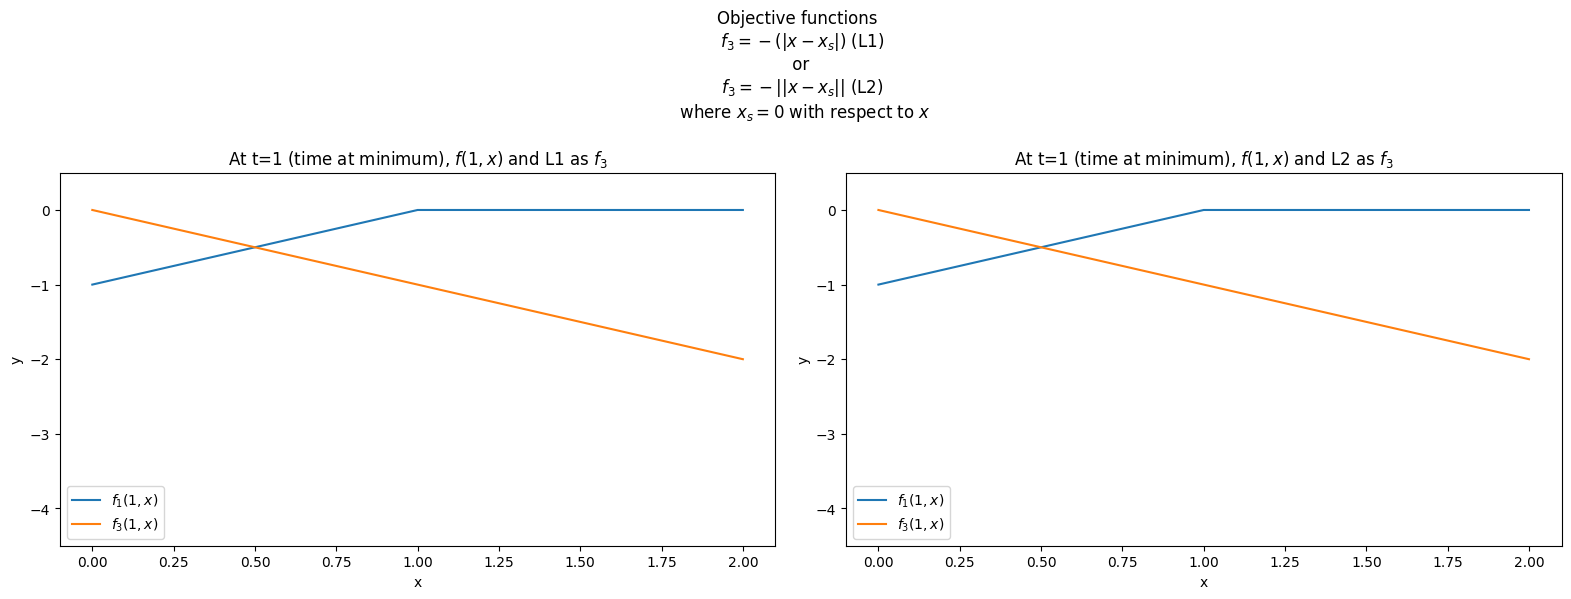

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(
    "Objective functions \n ${f_3=-(|x-x_s|)}$ (L1) \n or \n ${f_3=-||x-x_s||}$ (L2) \n  where ${x_s=0}$ with respect to ${x}$"
)
fig.tight_layout(pad=2, h_pad=5)

axs[0].set_title("At t=1 (time at minimum), ${f(1,x)}$ and L1 as ${f_3}$")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].plot(x_s, f_x_s, label="${f_1(1,x)}$")
axs[0].plot(x_s, f_3_l1_x_s, label="${f_3(1,x)}$")
axs[0].set_ylim([-4.5, 0.5])
axs[0].set_xlim([-0.1, 2.1])
axs[0].legend()

axs[1].set_title("At t=1 (time at minimum), ${f(1,x)}$ and L2 as ${f_3}$")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].plot(x_s, f_x_s, label="${f_1(1,x)}$")
axs[1].plot(x_s, f_3_x_s, label="${f_3(1,x)}$")
axs[1].set_ylim([-4.5, 0.5])
axs[1].set_xlim([-0.1, 2.1])
axs[1].legend()

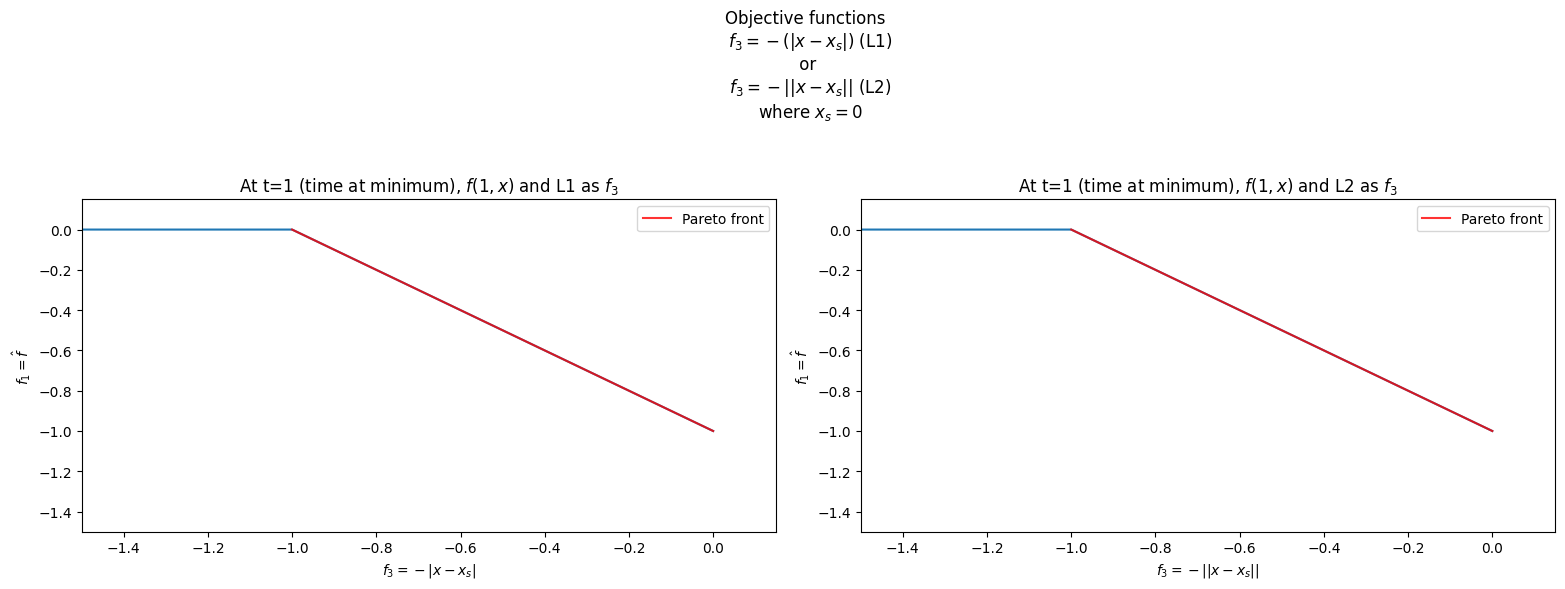

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(
    "Objective functions \n ${f_3=-(|x-x_s|)}$ (L1) \n or \n ${f_3=-||x-x_s||}$ (L2) \n where ${x_s=0}$"
)
fig.tight_layout(pad=3, h_pad=5)

indices = 101

x_s_mah = [f_3_l1(0, x) for x in x_s]
x_s_square = [f_3_l2(0, x) for x in x_s]

axs[0].set_title("At t=1 (time at minimum), ${f(1,x)}$ and L1 as ${f_3}$")
axs[0].set_xlabel("${f_3=-|x-x_s|}$")
axs[0].set_ylabel("${f_1=\hat{f}}$")
axs[0].plot(x_s_mah, f_x_s)
axs[0].plot(
    x_s_mah[:indices], f_x_s[:indices], label="Pareto front", color="red", alpha=0.8
)
# axs[0].plot(x_s,f_3_l1_x_s, label="${f_3(t,0)}$")
axs[0].set_ylim([-1.5, 0.15])
axs[0].set_xlim([-1.5, 0.15])
axs[0].legend()

axs[1].set_title("At t=1 (time at minimum), ${f(1,x)}$ and L2 as ${f_3}$")
axs[1].set_xlabel("${f_3=-||x-x_s||}$")
axs[1].set_ylabel("${f_1=\hat{f}}$")
axs[1].plot(x_s_square, f_x_s)
axs[1].plot(
    x_s_square[:indices], f_x_s[:indices], label="Pareto front", color="red", alpha=0.8
)
# axs[1].plot(x_s,f_3_x_s, label="${f_3(1,x)}$")
axs[1].set_ylim([-1.5, 0.15])
axs[1].set_xlim([-1.5, 0.15])
axs[1].legend()